Exercise 1: Creating a Scatter Plot with Aesthetic Mappings
Objective:

Use plotnine to create a scatter plot from a given dataset. The plot should map at least two variables to the x and y-axes and include an aesthetic mapping for color based on a third variable.

Instructions
Load your dataset into a pandas DataFrame.
Import the necessary components from plotnine.
Create a scatter plot using geom_point() where you map the x-axis to one variable and the y-axis to another.
Add an aesthetic mapping to color the points based on a third variable.
Customize the labels and title of the plot.
Display the plot.
Expected Learning Outcome:

Understand how to create scatter plots and apply aesthetic mappings in plotnine.

In [1]:
import pandas as pd
from plotnine import *

df = pd.read_csv('/content/Iris.csv')

In [9]:
df.info()
df.describe()
dups = df.duplicated().sum()
print(dups)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
0


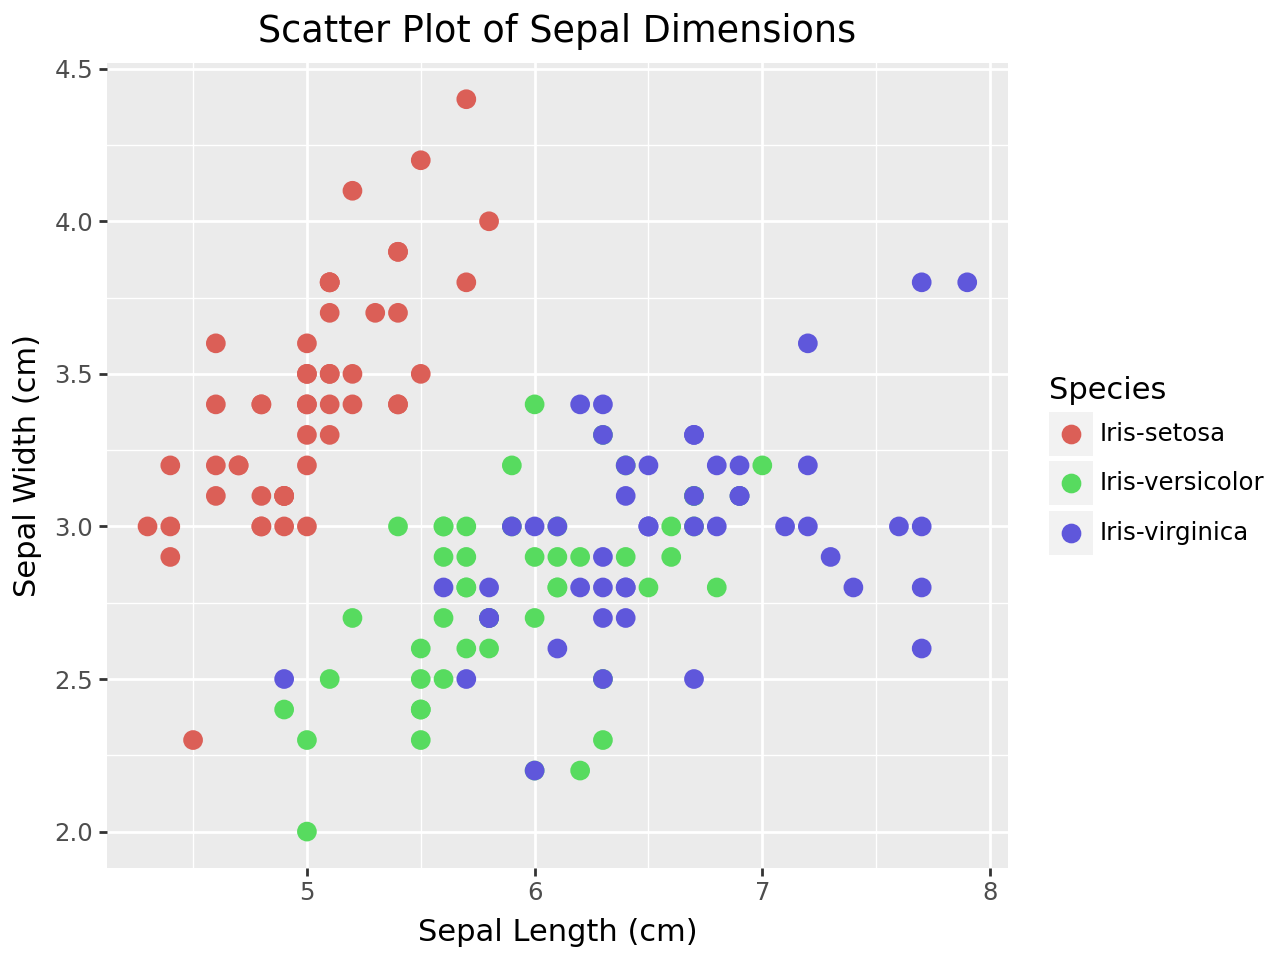

In [11]:
plot = (
    ggplot(df, aes(x='SepalLengthCm', y='SepalWidthCm', color='Species')) +
    geom_point(size=3) +
    labs(
        title='Scatter Plot of Sepal Dimensions',
        x='Sepal Length (cm)',
        y='Sepal Width (cm)',
        color='Species'
    )
)
plot

Exercise 2: Building a Stacked Bar Chart
Objective

Create a stacked bar chart using plotnine that visualizes the counts of a categorical variable, stacked by another categorical variable.

Instructions
Load your dataset into a pandas DataFrame.
Import the necessary components from plotnine.
Use geom_bar() to create a bar chart. Ensure the bars are stacked.
Map the x-axis to a categorical variable.
Use the fill aesthetic to stack the bars based on another categorical variable.
Add appropriate labels and a title to your chart.
Display the plot.
Expected Learning Outcome:

Learn to create and customize stacked bar charts in plotnine.

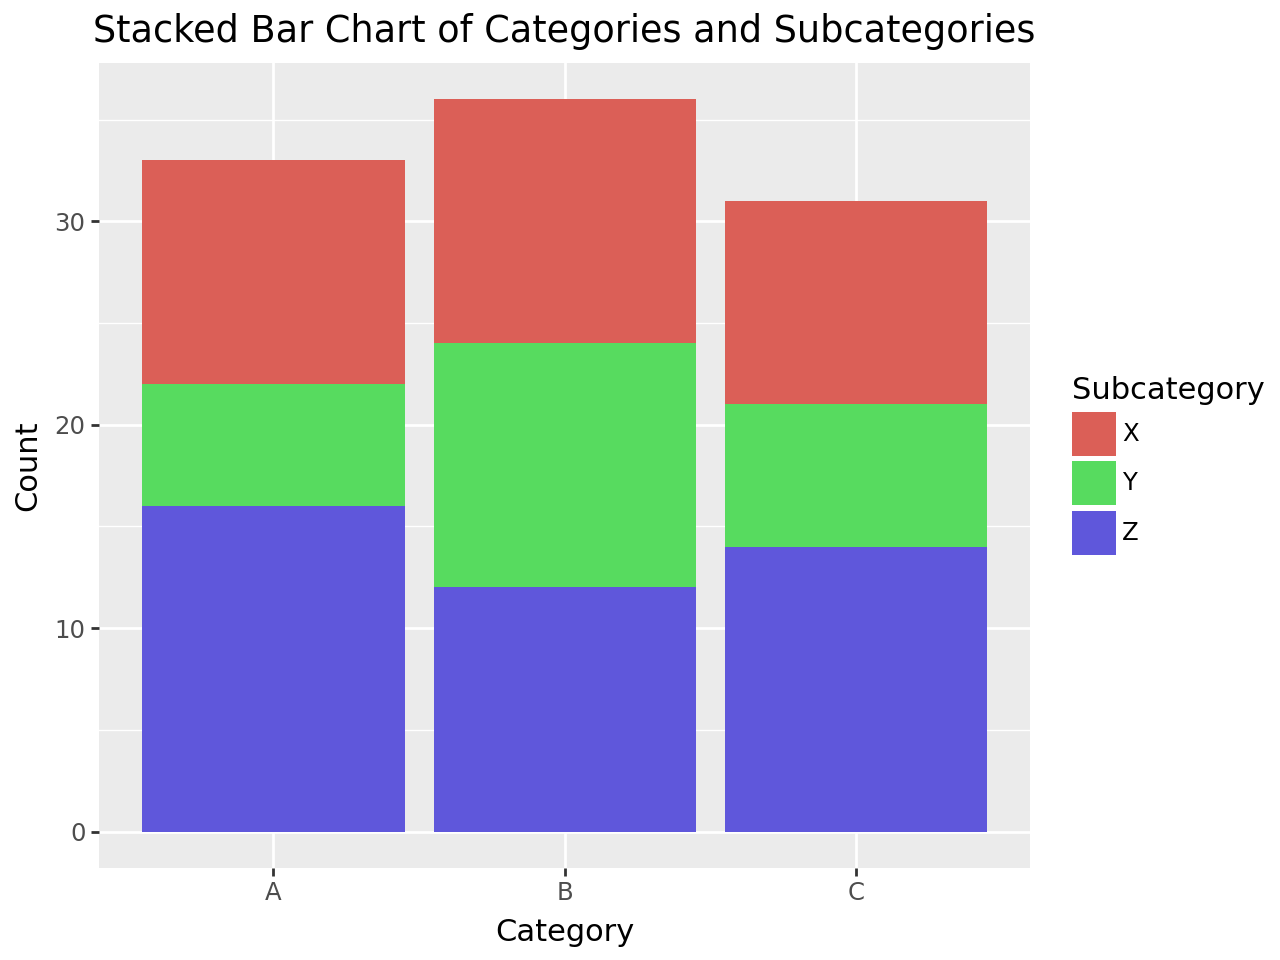

In [26]:
import numpy as np

np.random.seed(42)
categories = ['A', 'B', 'C']
subcategories = ['X', 'Y', 'Z']
num_rows = 100
data = {
    'Category': np.random.choice(categories, size=num_rows),
    'Subcategory': np.random.choice(subcategories, size=num_rows)
}
df = pd.DataFrame(data)
df_counts = df.groupby(['Category', 'Subcategory']).size().reset_index(name='Count')
df_counts.head()
plot = (
    ggplot(df_counts, aes(x='Category',y='Count', fill='Subcategory')) +
    geom_bar(stat="identity") +
    labs(
        title="Stacked Bar Chart of Categories and Subcategories",
        x="Category",
        y="Count",
        fill="Subcategory"
    )
)
plot

Exercise 3: Exploring Facet Wrapping in Plotnine
Objective:

Use plotnine to create a series of plots for different subsets of your data using facet wrapping.

Instructions
Load your dataset into a pandas DataFrame.
Import the necessary components from plotnine.
Create a basic plot (like a scatter plot or bar chart) using your dataset.
Apply facet_wrap() to your plot to create multiple panels, each representing a subset of your data based on a specified variable.
Customize the layout and appearance of the facet grid.
Add appropriate labels and titles to your plots.
Display the final plot.
Expected Learning Outcome:

Gain experience with creating multi-panel plots using facet wrapping in plotnine.



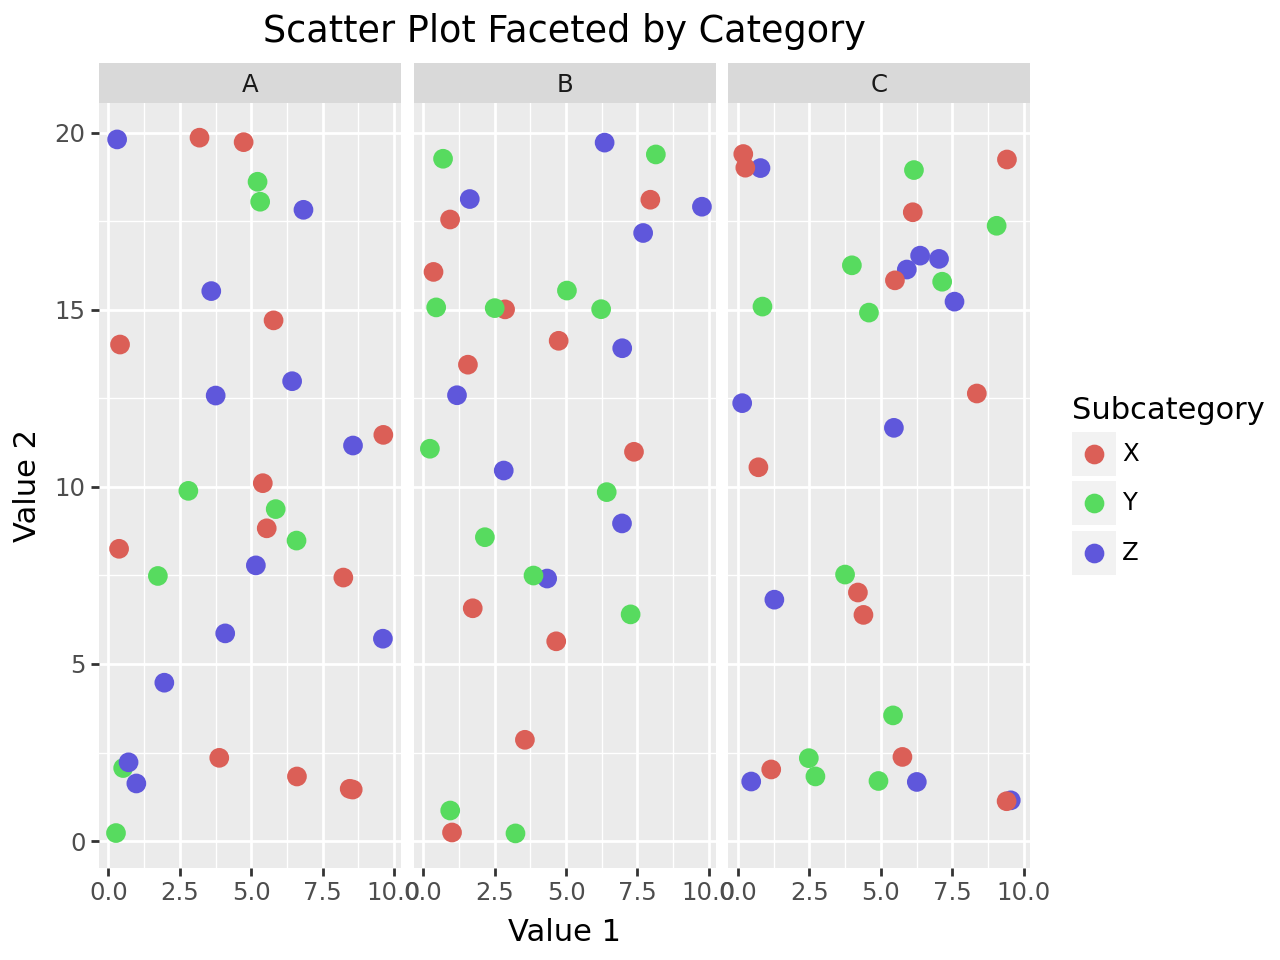

In [27]:
data = {
    'Category': np.random.choice(['A', 'B', 'C'], size=num_rows),
    'Subcategory': np.random.choice(['X', 'Y', 'Z'], size=num_rows),
    'Value1': np.random.rand(num_rows) * 10,
    'Value2': np.random.rand(num_rows) * 20
}
df = pd.DataFrame(data)
plot = (
    ggplot(df, aes(x='Value1', y='Value2', color='Subcategory')) +
    geom_point(size=3) +
    facet_wrap('~Category') +
    labs(
        title="Scatter Plot Faceted by Category",
        x="Value 1",
        y="Value 2",
        color="Subcategory"
    )
)
plot

Objective:

Create an interactive line chart using Plotly that visualizes the GDP per capita over time for a selected country from the Gapminder dataset.

Instructions
Load the GapMinder - Income Inequality Dataset into a pandas DataFrame.
Import the necessary components from plotly.
Filter the dataset for a specific country of your choice.
Create a line chart that plots year on the x-axis and GDP per capita on the y-axis.
Ensure the chart is interactive, allowing for hover-over details.
Add appropriate labels and a title to your chart.
Expected Learning Outcome:

Learn to create interactive line charts and handle time series data in Plotly.



In [45]:
df = pd.read_csv('/content/gapminder_data_graphs.csv')
df.head()

,country,continent,year,life_exp,hdi_index,co2_consump,gdp,services
0,Afghanistan,Asia,1998,53.3,0.344,0.0522,NaN,24.4
1,Afghanistan,Asia,1999,54.7,0.348,0.0402,NaN,24.6
2,Afghanistan,Asia,2000,54.7,0.350,0.0370,NaN,24.7
3,Afghanistan,Asia,2001,54.8,0.353,0.0376,NaN,24.7
4,Afghanistan,Asia,2002,55.5,0.384,0.0471,333.0,25.6


In [47]:
df = df.dropna()
df.info()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 3532 entries, 4 to 3674
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      3532 non-null   object 
 1   continent    3532 non-null   object 
 2   year         3532 non-null   int64  
 3   life_exp     3532 non-null   float64
 4   hdi_index    3532 non-null   float64
 5   co2_consump  3532 non-null   float64
 6   gdp          3532 non-null   float64
 7   services     3532 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 248.3+ KB


0

In [50]:
import plotly.express as px

country = "Afghanistan"
df_country = df[df['country'] == country]
fig = px.line(df_country, x='year', y='gdp',
              title=f"GDP per Capita Over Time - {country}",
              labels={'gdp': 'GDP per Capita (USD)', 'year': 'Year'})
fig

Objective:

Use Plotly to create a 3D scatter plot that visualizes the three different species of the Iris dataset with respect to their sepal length, sepal width, and petal length.

Instructions
Load the Iris dataset into a pandas DataFrame.
Import the necessary components from plotly.
Create a 3D scatter plot mapping sepal length, sepal width, and petal length to the three axes.
Use color to distinguish between the different species.
Add hover-over text for each data point displaying its species name.
Include a descriptive title and axis labels.
Expected Learning Outcome:

Understand how to create and customize 3D scatter plots in Plotly.



In [87]:
df = pd.read_csv('/content/Iris.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [88]:
fig = px.scatter_3d(df,
                    x='SepalLengthCm',
                    y='SepalWidthCm',
                    z='PetalLengthCm',
                    color='Species',
                    title="3D Scatter Plot of Iris Species",
                    labels={'SepalLengthCm': 'Sepal Length (cm)',
                            'SepalWidthCm': 'Sepal Width (cm)',
                            'PetalLengthCm': 'Petal Length (cm)',
                            'Species': 'Iris Species'})
fig

Objective:

Create an interactive heatmap using Plotly to visualize flight frequency between different US cities using a flight dataset.

Instructions
Load a dataset containing flight frequencies between major US cities like this Airlines Dataset to predict a delay.
Import the necessary components from plotly.
Use the plotly.graph_objects module to create a heatmap.
The x-axis should represent departure cities, and the y-axis should represent arrival cities.
The color intensity of each cell in the heatmap should represent the number of flights.
Ensure interactivity with hover-over text for each cell showing the exact number of flights.
Expected Learning Outcome:

Gain skills in creating and interpreting heatmaps, and handling geographical data in Plotly.

In [54]:
df = pd.read_csv('/content/Airlines.csv')
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [58]:
df.info()
df.duplicated().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [74]:
import pandas as pd
import plotly.graph_objects as go
top_airports = df['AirportFrom'].value_counts().head(20).index
filtered_df = df[df['AirportFrom'].isin(top_airports) & df['AirportTo'].isin(top_airports)]
pivot_table = filtered_df.pivot_table(
    index='AirportTo',
    columns='AirportFrom',
    values='Flight',
    aggfunc='count',
    fill_value=0
)
heatmap = go.Figure(
    data=go.Heatmap(
        z=pivot_table.values,
        x=pivot_table.columns,
        y=pivot_table.index,
        colorscale='Viridis',
        colorbar=dict(title='Flight Frequency'),
        hoverongaps=False
    )
)
heatmap.update_layout(
    title='Flight Frequencies Between US Cities',
    xaxis=dict(title='Departure City'),
    yaxis=dict(title='Arrival City'),
    height=800,
    width=1600
)
heatmap

Objective:

Create a time-series plot using Matplotlib to visualize large-scale stock market data over time.

Instructions
Download the stock market dataset from the Yahoo Finance API (use yfinance Python package to access data for a major stock index like S&P 500 over the past 10 years).
Load the data into a pandas DataFrame.
Import matplotlib.pyplot.
Plot the closing prices (Close column) against the dates.
Ensure your plot handles the large dataset efficiently by aggregating data or using data sampling.
Customize the plot with a title, axis labels, and a grid.
Implement interactive features like zooming and panning for better usability.
Expected Learning Outcome:

Learn techniques for efficiently visualizing large time-series data using Matplotlib.

In [77]:
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
# Define the stock index and timeframe
ticker = "^GSPC"  # S&P 500 index ticker
start_date = "2018-01-01"
end_date = "2024-06-30"

# Download data
data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [94]:
df = pd.DataFrame(data)
df.head()
# df.info()
# df.columns
monthly_data = data['Close'].resample('ME').mean()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

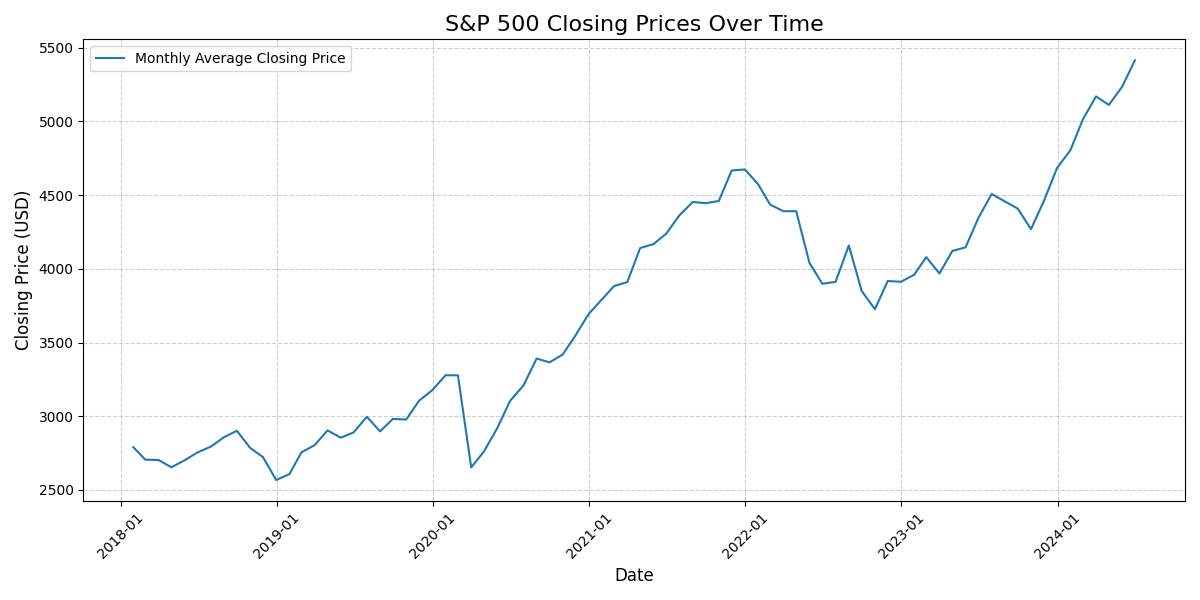

In [101]:
from google.colab import output
output.enable_custom_widget_manager()
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_data.index, monthly_data.values, label="Monthly Average Closing Price")
ax.set_title("S&P 500 Closing Prices Over Time", fontsize=16)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Closing Price (USD)", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()
date_format = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.tight_layout()
plt


Objective:

Use Plotly to create an interactive scatter plot to explore a large dataset of flight delays, focusing on the relationship between the delay duration and the time of the day.

Dataset URL

Flight Delay Data

Instructions
Download the flight delay dataset from the provided URL, focusing on a single year of data for a comprehensive yet manageable size.
Load the data into a pandas DataFrame.
Import the necessary components from plotly.
Create an interactive scatter plot with the time of the day on the x-axis and delay duration on the y-axis.
Color-code the points based on the airline.
Add hover-over text displaying the flight number, departure, and arrival cities.
Customize the layout, including a title, axis labels, and a legend.
Expected Learning Outcome:

Develop skills in creating interactive visualizations for large datasets and learn how to extract meaningful insights from complex data patterns using Plotly.



In [113]:
df = pd.read_csv('/content/Airline_Delay_Cause.csv')
df = df[df['year'] == 2023]
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
232,2023,12,AA,American Airlines Network,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",621.0,141.0,54.30,1.30,...,1.12,52.68,0.0,0.0,8562.0,3464.0,52.0,1091.0,47.0,3908.0
233,2023,12,AA,American Airlines Network,AUS,"Austin, TX: Austin - Bergstrom International",1214.0,247.0,72.62,2.27,...,1.36,85.41,0.0,1.0,12022.0,3843.0,68.0,2745.0,127.0,5239.0
234,2023,12,AA,American Airlines Network,BNA,"Nashville, TN: Nashville International",572.0,126.0,41.69,0.45,...,0.04,62.17,0.0,0.0,7887.0,2040.0,31.0,649.0,3.0,5164.0
235,2023,12,AA,American Airlines Network,BOS,"Boston, MA: Logan International",1268.0,261.0,70.44,2.86,...,0.84,104.73,4.0,3.0,16428.0,4062.0,239.0,3192.0,21.0,8914.0
236,2023,12,AA,American Airlines Network,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",276.0,54.0,19.13,0.70,...,0.90,26.66,0.0,0.0,4740.0,1808.0,62.0,233.0,129.0,2508.0


In [114]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 232 to 579
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 348 non-null    int64  
 1   month                348 non-null    int64  
 2   carrier              348 non-null    object 
 3   carrier_name         348 non-null    object 
 4   airport              348 non-null    object 
 5   airport_name         348 non-null    object 
 6   arr_flights          348 non-null    float64
 7   arr_del15            348 non-null    float64
 8   carrier_ct           348 non-null    float64
 9   weather_ct           348 non-null    float64
 10  nas_ct               348 non-null    float64
 11  security_ct          348 non-null    float64
 12  late_aircraft_ct     348 non-null    float64
 13  arr_cancelled        348 non-null    float64
 14  arr_diverted         348 non-null    float64
 15  arr_delay            348 non-null    float6

In [115]:
df = df[(df['arr_cancelled'] == 0) & (df['arr_diverted'] == 0)]
df['time_of_year'] = df['month']

<ipython-input-115-f058c69a44b7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
fig = px.scatter(
    df,
    x="time_of_year",
    y="arr_delay",
    color="carrier_name",
    size="arr_flights",
    hover_data=["carrier", "airport_name", "arr_delay"],
    labels={
        "time_of_year": "Month",
        "arr_delay": "Arrival Delay (Minutes)",
        "carrier_name": "Airline",
    },
    title="Flight Delays by Month and Airline"
)
fig.update_layout(
    xaxis=dict(
        title="Month",
        tickmode="array",
        tickvals=list(range(1, 13)),
        ticktext=[
            "Jan", "Feb", "Mar", "Apr", "May", "Jun",
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
        ]
    ),
    yaxis_title="Arrival Delay (Minutes)",
    legend_title="Airline",
    template="plotly_white",
)
fig.show()